## Setup

### Import libraries

In [100]:
import pandas as pd
import numpy as np
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Set library parameters

In [101]:
# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Pandas + matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Pyplot options
plt.rcParams.update({'font.size': 16, 'font.sans-serif': 'Arial'})

### Import raw SF 311 data
Data downloaded from https://data.sfgov.org/City-Infrastructure/311-Cases/vw6y-z8j6 on February 6, 2020

In [6]:
df = pd.read_csv('../data/311_Cases.csv')
# df.head()

/Users/ihwang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Explore abandoned vehicles

Let's get a feel for the data by printing the columns

In [7]:
# Print all columns names
print(df.columns)

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Street', 'Supervisor District', 'Neighborhood',
       'Police District', 'Latitude', 'Longitude', 'Point', 'Source',
       'Media URL', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       ':@computed_region_rxqg_mtj9', ':@computed_region_yftq_j783',
       ':@computed_region_jx4q_fizf', ':@computed_region_bh8s_q3mv',
       ':@computed_region_p5aj_wyqh', ':@computed_region_fyvs_ahh9',
       ':@computed_region_f58d_8dbm', ':@computed_region_9dfj_4gjx',
       ':@computed_region_vtsz_7cme', ':@computed_region_n4xg_c4py',
       ':@computed_region_sruu_94in', ':@computed_region_4isq_27mq',
       ':@computed_region_viu7_rrfi', ':@computed_region_fcz8_est8',
       ':@computed_region_pigm_ib2e', ':@computed_region_9jxd_iqea',
       ':@computed_regi

What do abandoned vehicle cases look like?

In [8]:
df[df['Category'] == 'Abandoned Vehicle'].head(5)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,:@computed_region_rxqg_mtj9,:@computed_region_yftq_j783,:@computed_region_jx4q_fizf,:@computed_region_bh8s_q3mv,:@computed_region_p5aj_wyqh,:@computed_region_fyvs_ahh9,:@computed_region_f58d_8dbm,:@computed_region_9dfj_4gjx,:@computed_region_vtsz_7cme,:@computed_region_n4xg_c4py,:@computed_region_sruu_94in,:@computed_region_4isq_27mq,:@computed_region_viu7_rrfi,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6ezc_tdp2,:@computed_region_6pnf_4xz7,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4,:@computed_region_y6ts_4iup,Neighborhoods
137,571367,12/30/2009 08:55:08 AM,12/31/2009 08:49:35 AM,12/31/2009 08:49:35 AM,Closed,DPT Abandoned Vehicles - Gone on Arrival - 345 12-30-09 @1300,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car2door,WHITE - CHRYSLER - PT CRUISER - 6HLF634,"260 CRESCENT AVE, SAN FRANCISCO, CA, 94110",CRESCENT AVE,9.0,Holly Park,INGLESIDE,37.734905,-122.419296,"(37.73490524, -122.41929626)",Phone,NaN,61.0,9.0,2.0,2.0,7.0,2.0,4.0,28859.0,7.0,2.0,2.0,NaN,61.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,61.0
143,571354,12/30/2009 08:48:33 AM,12/30/2009 09:11:47 AM,12/30/2009 09:11:47 AM,Closed,Case is a Duplicate - called in earlier 12-30-09 @0848 with an actual 1020,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - Other,SILVER - ??? - ???? - 15AZ097,Intersection of CRESCENT AVE and ROSCOE ST,CRESCENT AVE,9.0,Holly Park,INGLESIDE,37.734982,-122.418724,"(37.73498154, -122.41872406)",Phone,NaN,61.0,9.0,2.0,2.0,7.0,2.0,4.0,28859.0,7.0,2.0,2.0,NaN,61.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,61.0
173,571260,12/29/2009 09:37:29 PM,12/30/2009 07:08:40 AM,12/30/2009 07:08:40 AM,Closed,Case is a Duplicate - veh marked with a actual address on 12-29-09 @1305 145 \n @ 735 mangels,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - Trailer,NaN,Intersection of MANGELS AVE and MELROSE AVE,MANGELS AVE,7.0,Westwood Highlands,INGLESIDE,37.732994,-122.453857,"(37.73299408, -122.45385742)",Web,NaN,117.0,9.0,8.0,41.0,4.0,9.0,4.0,59.0,7.0,40.0,40.0,NaN,117.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,117.0
249,571010,12/29/2009 01:13:16 PM,12/29/2009 05:07:45 PM,12/29/2009 05:07:45 PM,Closed,Case Resolved - car has moved per Caller,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car4door,Black - Ecord - Honda - 6EUR372,"180 BOCANA ST, SAN FRANCISCO, CA, 94110",BOCANA ST,9.0,Bernal Heights,INGLESIDE,37.741028,-122.417595,"(37.74102783, -122.41759491)",Phone,NaN,83.0,9.0,2.0,2.0,7.0,2.0,4.0,28859.0,7.0,2.0,2.0,NaN,83.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,83.0
261,571000,12/29/2009 01:00:40 PM,12/31/2009 08:54:21 AM,12/31/2009 08:54:21 AM,Closed,DPT Abandoned Vehicles - Gone on Arrival - 246 12-30-09 @1035,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - PickupTruck,Blue - Toyota - Tacoma - 5E52043,"61 ELSIE ST, SAN FRANCISCO, CA, 94110",ELSIE ST,9.0,Bernal Heights,INGLESIDE,37.744030,-122.416771,"(37.74403, -122.41677094)",Phone,NaN,83.0,9.0,2.0,2.0,7.0,2.0,4.0,28859.0,7.0,2.0,2.0,NaN,83.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,83.0


Let's get a feel for how many license plates are recorded in abandoned vehicles. First, let's do a regular expression search for California license plate format NLLLNNN where:
* N = any number between 0-9
* L = any letter between A-Za-z

*** Caveat: some license plates don't follow this format and many cases don't even list a license plate.

In [9]:
# Create an abandoned vehicles (AV) dataframe
df_av = df[(df['Category'] == 'Abandoned Vehicle') & (df['Request Details'].notna())]

# Also create a dataframe of AV calls with media
df_av_media = df_av[df_av['Media URL'].notna()]

In [10]:
# Select dataframe to examine
df_test = df_av

# Do a regular expression search for the license plate format NLLLNNN
plates_all = [re.search(r'[0-9]{1}[A-Za-z]{3}[0-9]{3}', str(row)) for row in df_test['Request Details']]

# Convert letters in license plates to uppercase and filter out None values
plates_all_upper = [plate.group(0).upper() for plate in plates_all if plate]

# Create a pandas series containing all uppercase license plates
se_plates = pd.Series(plates_all_upper)

# Print basic information
print('Total number of abandoned vehicles cases: ', len(df_test))
print('Number of abandoned vehicles cases that record license plate: ', len(se_plates))
print('Number of unique license plates recorded in all abandoned vehicles cases: ', len(set(se_plates)))

Total number of abandoned vehicles cases:  233077
Number of abandoned vehicles cases that record license plate:  92139
Number of unique license plates recorded in all abandoned vehicles cases:  58393


It looks like less than 40% of abandoned vehicle cases recorded a license plate. These cases contained license plate information for nearly 60,000 unique plates --- out of nearly 100,000 cases.

So, there must be some abandoned vehicles that were recorded in multiple cases. Let's take a look at those vehicles --- arbitrarily, the top 10 most reported vehicles.

In [11]:
se_plates.value_counts().sort_values(ascending=False).head(10)

4AHL026    146
3LXY721    115
6PUJ756    87 
1RNW837    74 
6PUK177    65 
1PLM055    58 
6XVM291    58 
3XTE099    58 
6SLZ243    56 
7ZIB155    55 
dtype: int64

How many vehicles were called in more than $n_{calls}$ times?

In [12]:
n_calls = 5
se_plates_counts = se_plates.value_counts()
n_plates = len(se_plates_counts[se_plates_counts > n_calls])
print('Number of vehicles called in more than %d times: %d' %(n_calls, n_plates))

Number of vehicles called in more than 5 times: 1418


Let's take a look at case details for one particular plate that was called in multiple times

In [13]:
plate = '6XVM291'
df_av[df_av['Request Details'].str.contains(plate)].head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,:@computed_region_rxqg_mtj9,:@computed_region_yftq_j783,:@computed_region_jx4q_fizf,:@computed_region_bh8s_q3mv,:@computed_region_p5aj_wyqh,:@computed_region_fyvs_ahh9,:@computed_region_f58d_8dbm,:@computed_region_9dfj_4gjx,:@computed_region_vtsz_7cme,:@computed_region_n4xg_c4py,:@computed_region_sruu_94in,:@computed_region_4isq_27mq,:@computed_region_viu7_rrfi,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6ezc_tdp2,:@computed_region_6pnf_4xz7,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4,:@computed_region_y6ts_4iup,Neighborhoods
809707,4685099,04/21/2015 06:26:41 PM,04/28/2015 07:43:31 AM,04/28/2015 07:43:31 AM,Closed,DPT Abandoned Vehicles- Gone on arrival - 04/27/15 @1108 #129,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car2door,light blue - Chevrolet - - 6XVM291,"40 CHENERY ST, SAN FRANCISCO, CA, 94131",CHENERY ST,8.0,Fairmount,INGLESIDE,37.741135,-122.425850,"(37.74113464, -122.42584991)",Web,NaN,59.0,9.0,5.0,10.0,5.0,2.0,4.0,63.0,7.0,7.0,7.0,NaN,59.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,59.0
813040,4673372,04/17/2015 01:03:57 PM,04/27/2015 06:41:41 AM,04/27/2015 06:41:41 AM,Closed,DPT Abandoned Vehicles- Gone on arrival - 04/24/15 @1250 #129,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car2door,gray - - - 6XVM291,"70 CHENERY ST, SAN FRANCISCO, CA, 94131",CHENERY ST,8.0,Fairmount,INGLESIDE,37.740446,-122.425747,"(37.74044566, -122.42574675)",Phone,NaN,59.0,9.0,5.0,10.0,5.0,2.0,4.0,63.0,7.0,7.0,7.0,NaN,59.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,59.0
815953,4663645,04/14/2015 12:19:56 PM,04/18/2015 03:38:18 AM,04/18/2015 03:38:18 AM,Closed,DPT Abandoned Vehicles- Gone on arrival - 04/17/15 @ 1346 #129,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car4door,grey - Kaiser Deluxe - - 6XVM291,"292 WHITNEY ST, SAN FRANCISCO, CA, 94131",WHITNEY ST,8.0,Fairmount,INGLESIDE,37.737425,-122.427688,"(37.73742524, -122.42768849)",Phone,NaN,59.0,9.0,5.0,10.0,5.0,2.0,4.0,63.0,7.0,7.0,7.0,NaN,59.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,59.0
843246,4569286,03/12/2015 11:42:47 AM,03/16/2015 08:41:35 AM,03/16/2015 08:41:35 AM,Closed,DPT Abandoned Vehicles- Gone on arrival - 3-13-15 @ 0943 HRS # 129,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car2door,blue/gray - Kaiser - vintage vehicle - 6XVM291,"51 CHENERY ST, SAN FRANCISCO, CA, 94131",CHENERY ST,8.0,Fairmount,INGLESIDE,37.741034,-122.425575,"(37.74103356, -122.42557519)",Phone,NaN,59.0,9.0,5.0,10.0,5.0,2.0,4.0,63.0,7.0,7.0,7.0,NaN,59.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,59.0
865703,4494423,02/15/2015 12:25:52 PM,02/19/2015 07:54:37 AM,02/19/2015 07:54:37 AM,Closed,DPT Abandoned Vehicles- Gone on arrival - 02/18/15 @1549 #129,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car2door,Blue - Kaiser - unknown - 6XVM291,Intersection of ARLINGTON ST and RANDALL ST,ARLINGTON ST,8.0,Fairmount,INGLESIDE,37.739859,-122.424504,"(37.7398589, -122.42450358)",Phone,NaN,59.0,9.0,5.0,10.0,5.0,2.0,4.0,63.0,7.0,7.0,7.0,NaN,59.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,59.0


### Extract top $n$ abandoned vehicles that have been called in the most

Let's stick to the plates/vehicles that were called in the most --- let's pick the top $n$ vehicles. Because we'll want to have plate information handy (for color-coding, grouping, etc.) let's create a new dataframe for each repeat offender, and then concatenate all of these cases into a new dataframe

In [14]:
n = 20
plates_top_repeats = list(se_plates.value_counts().sort_values(ascending=False).head(n).index)
list_plates_top_repeats = []
for plate in plates_top_repeats:
    df_plate = df_av[df_av['Request Details'].str.contains(plate, case=False)].copy()
    df_plate['Opened'] = pd.to_datetime(df_plate['Opened'])
    df_plate['Closed'] = pd.to_datetime(df_plate['Closed'])
    df_plate['Updated'] = pd.to_datetime(df_plate['Updated'])
    df_plate.reset_index(inplace=True)
    df_plate['Plate'] = pd.Series([plate]*len(df_plate))
    df_plate.sort_values(by=['Opened'], ascending=False, inplace=True)
    list_plates_top_repeats.append(df_plate)
df_plates_top_repeats = pd.concat(list_plates_top_repeats, ignore_index=True)

Export raw dataframe of top $n$ repeatedly abandoned vehicles

In [15]:
# df_plates_top_repeats.to_csv('../data/abandoned-vehicles_top%d.csv' %n)

### Examine the top $n$ vehicles

Which neighborhoods did these calls primarily take place in?

In [55]:
df_plates_top_repeats['Neighborhood'].value_counts().head(20)

Fairmount              221
Peralta Heights        114
Sutro Heights          97 
Forest Hill            83 
Golden Gate Heights    83 
Union Street           74 
Bernal Heights         72 
Seacliff               62 
Glen Park              59 
Miraloma Park          58 
Diamond Heights        47 
Apparel City           46 
Outer Sunset           43 
Upper Market           38 
Central Waterfront     36 
Noe Valley             27 
Lower Nob Hill         25 
Nob Hill               23 
Outer Richmond         13 
Potrero Hill           8  
Name: Neighborhood, dtype: int64

What kind of vehicles were these classified as?

In [53]:
df_plates_top_repeats.groupby('Plate')['Request Type'].value_counts(ascending=False)

Plate    Request Type                     
1PLM055  Abandoned Vehicle - Car4door         52 
         Abandoned Vehicle -                  6  
1RNW837  Abandoned Vehicle - Car4door         72 
         Abandoned Vehicle - Other            2  
2GYE544  Abandoned Vehicle - Other            48 
         Abandoned Vehicle - Trailer          3  
         Abandoned Vehicle -                  1  
         Abandoned Vehicle - Car4door         1  
         Abandoned Vehicles High              1  
2JPU300  Abandoned Vehicle - Other            35 
         Abandoned Vehicle - Trailer          7  
         Abandoned Vehicle - PickupTruck      5  
         Abandoned Vehicle - Car2door         2  
         Abandoned Vehicle - DeliveryTruck    1  
3EXG277  Abandoned Vehicle - Car4door         40 
         Abandoned Vehicle - Car2door         7  
         Abandoned Vehicle - Other            1  
         Abandoned Vehicles                   1  
3FDF542  Abandoned Vehicle - Other            21 
       

Okay, not all vehicles were classified as trailers, which are most likely being used by the homeless. Let's examine each of these top 20 plates and see which were most likely trailers.

In [82]:
plate = '7ZIB155'
possible_trailers = [
    '2GYE544', '2JPU300', '3FDF542', '3LXY721', '4AHL026', 
    '4AIA248', '5HTH408', '5NYL790', '6AMP741', '6PUJ756', 
    '7ZIB155'
]
# df_plates_top_repeats[df_plates_top_repeats['Plate'] == plate]
df_trailers = df_plates_top_repeats[df_plates_top_repeats['Plate'].isin(possible_trailers)]

When were these vehicles last seen?

In [86]:
df_trailers.groupby('Plate')['Opened'].max().sort_values(ascending=False)

Plate
7ZIB155   2020-02-05 15:10:00
6AMP741   2020-01-30 12:47:00
2JPU300   2019-11-01 07:54:00
2GYE544   2019-05-03 15:19:00
6PUJ756   2017-03-31 12:16:31
4AHL026   2016-08-02 08:00:35
3LXY721   2016-05-26 11:48:06
4AIA248   2016-05-14 15:15:11
3FDF542   2015-12-22 11:36:59
5HTH408   2012-08-20 10:04:47
5NYL790   2011-05-20 09:43:04
Name: Opened, dtype: datetime64[ns]

Most likely plates 7ZIB155, 2JPU300 and 6AMP741 are still in the area. Let's put them in their own list, called `recent_trailers`. Where do calls for these vehicles tend to take place?

In [107]:
recent_trailers = ['7ZIB155','2JPU300','6AMP741']
df_recent_trailers = df_trailers[df_trailers['Plate'].isin(recent_trailers)]
df_recent_trailers.groupby('Plate')['Neighborhood'].value_counts()

Plate    Neighborhood       
2JPU300  Sutro Heights          47
         Outer Richmond         3 
6AMP741  Outer Sunset           31
         Seacliff               21
7ZIB155  Golden Gate Heights    51
         Outer Sunset           3 
         University Mound       1 
Name: Neighborhood, dtype: int64

When did calls on these vehicles tend to take place?

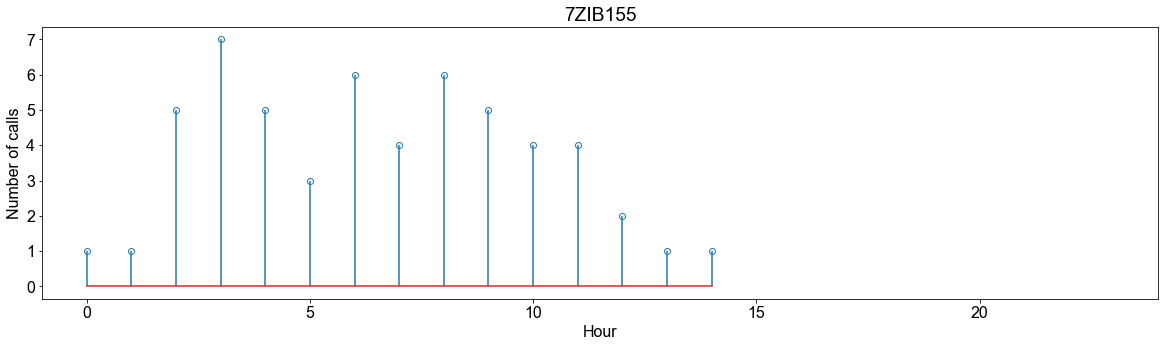

In [112]:
plate = '7ZIB155'
se_hours = df_recent_trailers[df_recent_trailers['Plate'] == plate]['Opened'].dt.hour.value_counts().sort_index().copy()

# Define figure parameters
fsize=16
fig, axes = plt.subplots(figsize=(20, 5))

markerline, stemlines, baseline = plt.stem(se_hours,
                                           use_line_collection=True
                                          )
markerline.set_markerfacecolor('none')
axes.set_ylabel('Number of calls')
axes.set_xlabel('Hour')
axes.set_title(plate)
plt.xlim([-1,24])
plt.show()

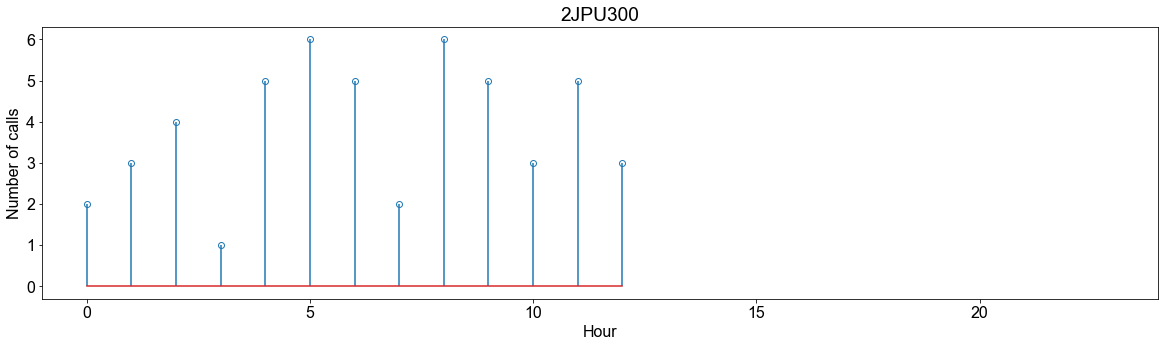

In [113]:
plate = '2JPU300'
se_hours = df_recent_trailers[df_recent_trailers['Plate'] == plate]['Opened'].dt.hour.value_counts().sort_index().copy()

# Define figure parameters
fsize=16
fig, axes = plt.subplots(figsize=(20, 5))

markerline, stemlines, baseline = plt.stem(se_hours,
                                           use_line_collection=True
                                          )
markerline.set_markerfacecolor('none')
axes.set_ylabel('Number of calls')
axes.set_xlabel('Hour')
axes.set_title(plate)
plt.xlim([-1,24])
plt.show()

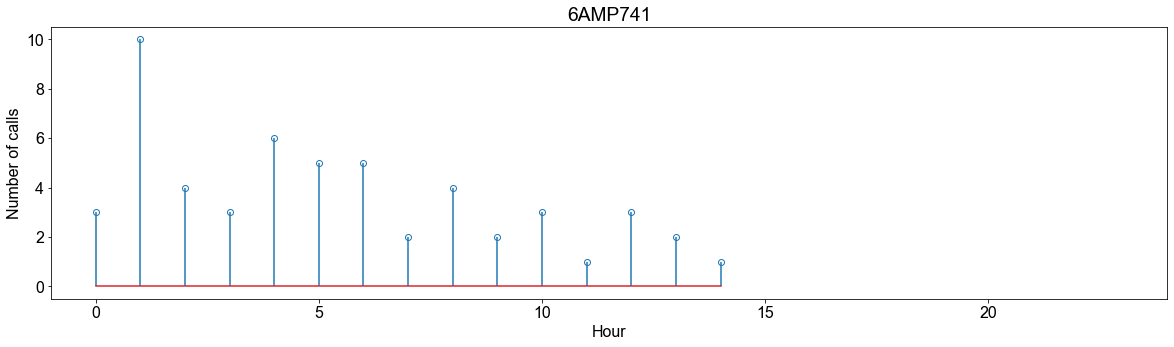

In [114]:
plate = '6AMP741'
se_hours = df_recent_trailers[df_recent_trailers['Plate'] == plate]['Opened'].dt.hour.value_counts().sort_index().copy()

# Define figure parameters
fsize=16
fig, axes = plt.subplots(figsize=(20, 5))

markerline, stemlines, baseline = plt.stem(se_hours,
                                           use_line_collection=True
                                          )
markerline.set_markerfacecolor('none')
axes.set_ylabel('Number of calls')
axes.set_xlabel('Hour')
axes.set_title(plate)
plt.xlim([-1,24])
plt.show()

Which PCO officers tended to take these cases?